Regression Task:
Objective: To automate the process for determining audit risk by building a regression model using the risk factors to save the computational time and costs involved in the traditional process of calculating Audit Risk Score using scores and risk factors 

Classification Task:
Objective: To Classify Weather the Firms are fradulent or not 

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import export_graphviz
from PIL import *
import graphviz
%matplotlib inline

## Loading Datasets

In [2]:
data1= pd.read_csv('audit_risk.csv')
data2= pd.read_csv('trial.csv')

In [3]:
data1.head(3)

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0


In [4]:
data2.head(3)

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0


As we can observe from the info of data1(Audit_Risk) , Total number of instances is only 776 whereas we know that there are a total of 777 firms. Also, Money_value has a total of 775 non null values instead of 776 non null values

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
Sector_score      776 non-null float64
LOCATION_ID       776 non-null object
PARA_A            776 non-null float64
Score_A           776 non-null float64
Risk_A            776 non-null float64
PARA_B            776 non-null float64
Score_B           776 non-null float64
Risk_B            776 non-null float64
TOTAL             776 non-null float64
numbers           776 non-null float64
Score_B.1         776 non-null float64
Risk_C            776 non-null float64
Money_Value       775 non-null float64
Score_MV          776 non-null float64
Risk_D            776 non-null float64
District_Loss     776 non-null int64
PROB              776 non-null float64
RiSk_E            776 non-null float64
History           776 non-null int64
Prob              776 non-null float64
Risk_F            776 non-null float64
Score             776 non-null float64
Inherent_Risk     776 non-null float64
CON

From the statistics of features in data1, detection risk was found to have zero variance

In [6]:
data1.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,...,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,...,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


In [7]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 18 columns):
Sector_score     776 non-null float64
LOCATION_ID      776 non-null object
PARA_A           776 non-null float64
SCORE_A          776 non-null int64
PARA_B           776 non-null float64
SCORE_B          776 non-null int64
TOTAL            776 non-null float64
numbers          776 non-null float64
Marks            776 non-null int64
Money_Value      775 non-null float64
MONEY_Marks      776 non-null int64
District         776 non-null int64
Loss             776 non-null int64
LOSS_SCORE       776 non-null int64
History          776 non-null int64
History_score    776 non-null int64
Score            776 non-null float64
Risk             776 non-null int64
dtypes: float64(7), int64(10), object(1)
memory usage: 109.2+ KB


In [8]:
data2.describe()

,Sector_score,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,775.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,20.184536,2.450194,3.512887,10.799988,3.131443,13.218481,5.067655,2.237113,14.137631,2.909794,2.505155,0.029639,2.061856,0.104381,2.167526,2.702577,0.626289
std,24.319017,5.678870,1.740549,50.083624,1.698042,51.312829,0.264449,0.803517,66.606519,1.597452,1.228678,0.184280,0.375080,0.531031,0.679869,0.858923,0.484100
min,1.850000,0.000000,2.000000,0.000000,2.000000,0.000000,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,2.370000,0.210000,2.000000,0.000000,2.000000,0.537500,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,3.890000,0.875000,2.000000,0.405000,2.000000,1.370000,5.000000,2.000000,0.090000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.400000,1.000000
75%,55.570000,2.480000,6.000000,4.160000,4.000000,7.707500,5.000000,2.000000,5.595000,4.000000,2.000000,0.000000,2.000000,0.000000,2.000000,3.250000,1.000000
max,59.850000,85.000000,6.000000,1264.630000,6.000000,1268.910000,9.000000,6.000000,935.030000,6.000000,6.000000,2.000000,6.000000,9.000000,6.000000,5.200000,1.000000


From the below analyses we found out that forest and electrical have the same sector score and the 777th firm which is missing is from the public health sector

In [9]:
# To find the number of firms in each sector in data1
data1['Sector_score'].value_counts()

55.57    200
3.89     114
1.85      95
2.72      82
3.41      76
2.37      74
1.99      47
21.61     41
59.85     37
2.34       5
15.56      3
2.36       1
17.68      1
Name: Sector_score, dtype: int64

In [10]:
#to find the order in which the sector scores are presesnt
data1['Sector_score'].unique()

array([ 3.89,  3.41,  2.72,  2.37,  1.99,  1.85,  2.36,  2.34, 15.56,
       17.68, 21.61, 59.85, 55.57])

In [11]:
# to find the number of firms in each sector in data2
data1['Sector_score'].value_counts()#to find the order in which the sector scores are presesnt

55.57    200
3.89     114
1.85      95
2.72      82
3.41      76
2.37      74
1.99      47
21.61     41
59.85     37
2.34       5
15.56      3
2.36       1
17.68      1
Name: Sector_score, dtype: int64

In [12]:
#to find the order in which the sector scores are presesnt in data2
data2['Sector_score'].unique()

array([ 3.89,  3.41,  2.72,  2.37,  1.99,  1.85,  2.36,  2.34, 15.56,
       17.68, 21.61, 59.85, 55.57])

In [13]:
#checking weather similar columns are same or diff in bot data1 and data2
list3=list(data1.columns)
list4=list(data2.columns)
list5=[]
for item1 in (list3):
    for item2 in (list4):
        val= data1[item1].equals(data2[item2])
        list5.append(val)
mat=np.matrix(np.array(list5).reshape(len(list3),len(list4)))
df= pd.DataFrame(mat,list3,list4)
df

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
Sector_score,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
LOCATION_ID,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
PARA_A,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Score_A,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Risk_A,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
PARA_B,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
Score_B,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Risk_B,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
TOTAL,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
numbers,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


Going by the Dataframe generated above and the dataset descriptions, The columns which should be simalar and are not were identified and the correlation was seen between those columns. Theese columns had 100% corrrel so we decided to take only loss and loss_score from data2

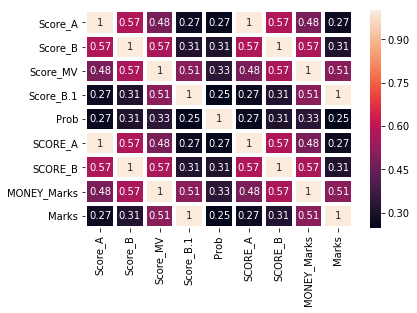

In [14]:
#data1 score a , data2 score a are diff
#data1 score b and data2 scoreb
#score mv and money marks
#scoreb.1 and marks are diff
#district loss and district are the same 
#prob and history score are diffrent
#risk is diff in each column
#money_value and money marks are diff
dat_cor1=data1[['Score_A','Score_B','Score_MV','Score_B.1','Prob']]
dat_cor1.index.names=['key']
dat_cor2=data2[['SCORE_A','SCORE_B','MONEY_Marks','Marks']]
dat_cor2.index.names=['key']
dat_cor=pd.merge(dat_cor1,dat_cor2,on=['key'],how='inner')
sns.heatmap(dat_cor.corr(),annot= True,linecolor='white',linewidths=3)

By the below analysis we found out that if the audit risk score is greater than 1 risk is 1, and if the audit risk score is less than 1 risk is 0. Also Risk in Data1 and Risk in Data 2 should be the same but they are different on 181 instances.
so we dont take the risk column from data2

In [15]:
data1['Risk'].equals(data2['Risk'])
list1=list(data1['Risk'][data1['Risk']!=data2['Risk']].index)
d1risk=data1.iloc[list1,26]
pd.DataFrame(d1risk)['Risk'].value_counts()

0    181
Name: Risk, dtype: int64

In [16]:
d2risk=data2.iloc[list1,17]
pd.DataFrame(d2risk)['Risk'].value_counts()

1    181
Name: Risk, dtype: int64

In [17]:
data1.iloc[list1,:].head(10)

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
key,,,,,,,,,,,,,,,,,,,,,
9,3.89,8,3.98,0.6,2.388,0.99,0.2,0.198,4.97,5.0,...,0.4,0,0.2,0.0,2.4,4.372,0.4,0.5,0.8744,0
13,3.89,8,1.09,0.4,0.436,0.35,0.2,0.070,1.44,5.0,...,0.4,0,0.2,0.0,2.2,1.906,0.4,0.5,0.3812,0
18,3.89,37,1.81,0.4,0.724,1.03,0.2,0.206,2.84,5.0,...,0.4,0,0.2,0.0,2.2,2.330,0.4,0.5,0.4660,0
21,3.89,3,0.02,0.2,0.004,5.94,0.4,2.376,5.96,5.0,...,0.4,0,0.2,0.0,2.6,3.782,0.4,0.5,0.7564,0
29,3.89,37,0.00,0.2,0.000,0.75,0.2,0.150,0.75,5.0,...,0.4,0,0.2,0.0,2.2,4.262,0.4,0.5,0.8524,0
44,3.89,19,1.32,0.4,0.528,0.00,0.2,0.000,1.32,5.0,...,0.4,0,0.2,0.0,2.2,1.940,0.4,0.5,0.3880,0
52,3.89,22,0.00,0.2,0.000,0.93,0.2,0.186,0.93,5.0,...,0.4,0,0.2,0.0,2.2,4.698,0.4,0.5,0.9396,0
61,3.89,11,1.26,0.4,0.504,0.05,0.2,0.010,1.31,5.0,...,0.4,0,0.2,0.0,2.2,1.914,0.4,0.5,0.3828,0
68,3.89,12,1.07,0.4,0.428,0.00,0.2,0.000,1.07,5.0,...,0.4,0,0.2,0.0,2.2,1.828,0.4,0.5,0.3656,0


In [18]:
data2.iloc[list1,:].head(10)

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
key,,,,,,,,,,,,,,,,,,
9,3.89,8,3.98,6,0.99,2,4.97,5.0,2,1.93,2,2,0,2,0,2,2.4,1
13,3.89,8,1.09,4,0.35,2,1.44,5.0,2,0.00,2,2,0,2,0,2,2.2,1
18,3.89,37,1.81,4,1.03,2,2.84,5.0,2,0.00,2,2,0,2,0,2,2.2,1
21,3.89,3,0.02,2,5.94,4,5.96,5.0,2,0.01,2,2,0,2,0,2,2.6,1
29,3.89,37,0.00,2,0.75,2,0.75,5.0,2,6.78,4,2,0,2,0,2,2.2,1
44,3.89,19,1.32,4,0.00,2,1.32,5.0,2,0.06,2,2,0,2,0,2,2.2,1
52,3.89,22,0.00,2,0.93,2,0.93,5.0,2,7.78,4,2,0,2,0,2,2.2,1
61,3.89,11,1.26,4,0.05,2,1.31,5.0,2,0.00,2,2,0,2,0,2,2.2,1
68,3.89,12,1.07,4,0.00,2,1.07,5.0,2,0.00,2,2,0,2,0,2,2.2,1


In [19]:
#if audit risk is greater than 1 risk is 1
x1=data1[['Risk','Audit_Risk']][data1['Risk']==1]
x1[x1['Audit_Risk']<1].shape[0]

0

In [20]:
data2= data2[['Loss','LOSS_SCORE']]

In [21]:
#to find the index of the missing value
index=data1[data1['Money_Value'].isnull()==True]
data1.drop('Detection_Risk',axis=1,inplace=True)
med= data1[data1['Sector_score']== 55.57]['Money_Value'].median()
data1.fillna(value=med,inplace=True)
data1['Money_Value'].isnull().sum()

0

In [22]:
#merging Audit risk(data1) and Trial(data2)
data1.index.names= ['key']
data= pd.merge(data1,data2,on=['key'],how='inner')


### Removing Duplicated Rows

In [23]:
data=data[data.duplicated(subset=None, keep='first')==False]

### Average Audit Risk Scores for each Location ID

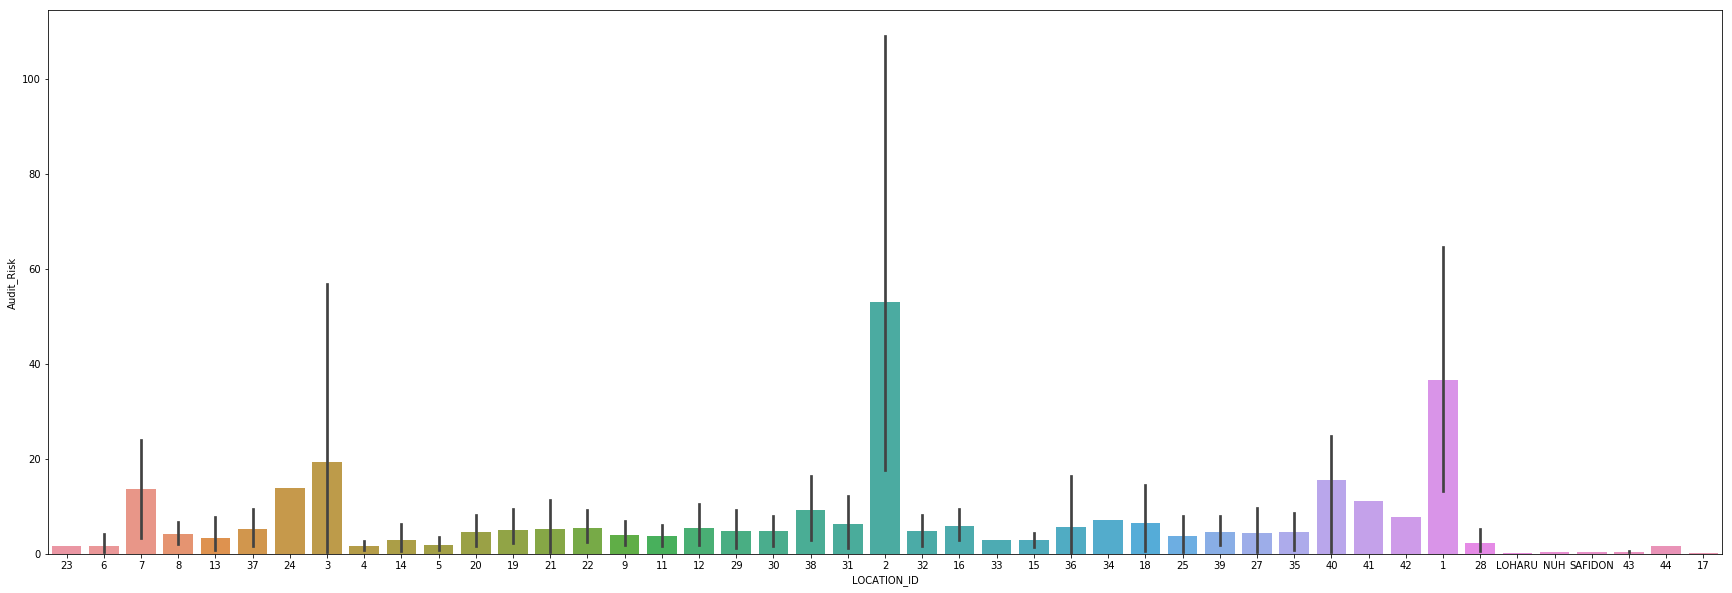

In [24]:
plt.figure(figsize=(30,10))
sns.barplot(x='LOCATION_ID',y='Audit_Risk',data= data,estimator=np.mean)

### Average Audit Risk Scores for each Sector Score

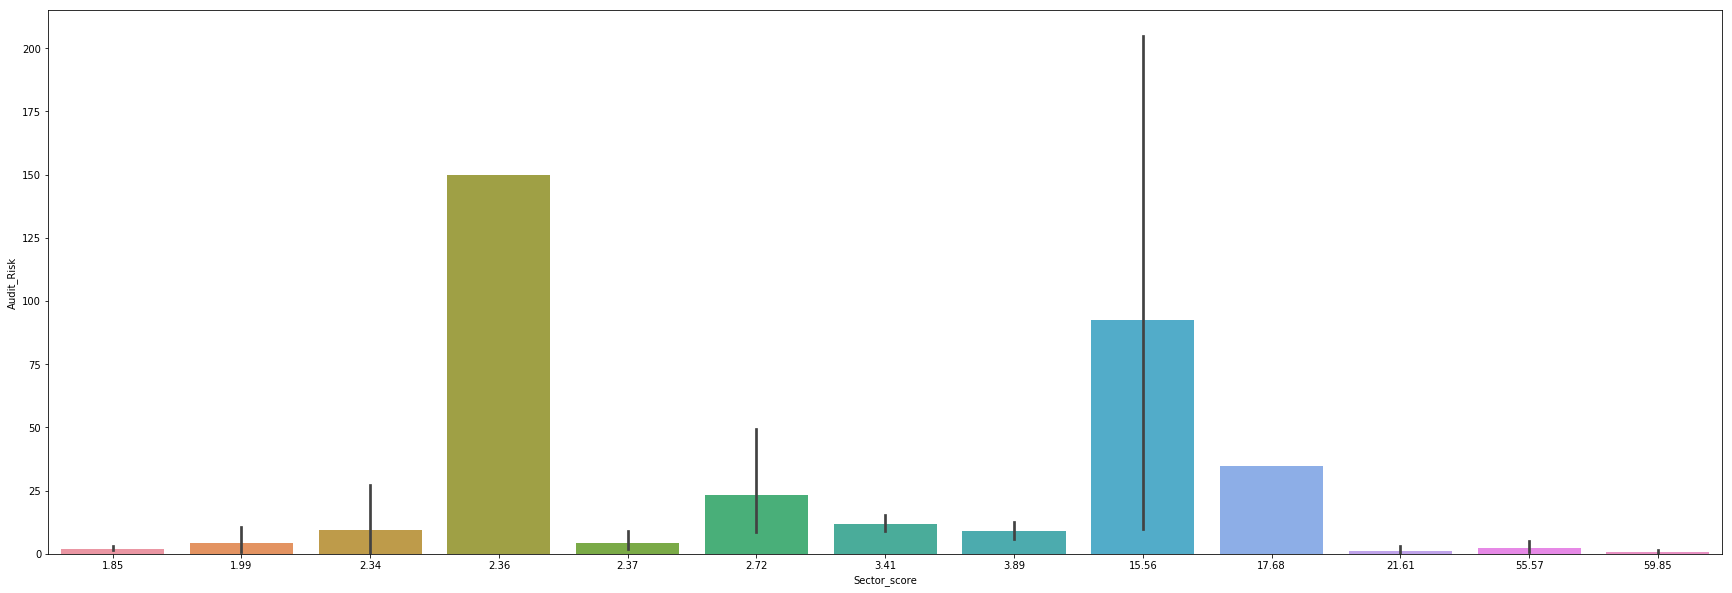

In [25]:
plt.figure(figsize=(30,10))
sns.barplot(x='Sector_score',y='Audit_Risk',data= data,estimator=np.mean)

Upon Further analyzing the correlation  we found that more features were correlated with each otheter by a high percentage, so we took the threshold as 0.70 , so if the correlation is above 0.70 we drop one of them using the prior knowldge we have about the variables from the data descriptions and the relations between them

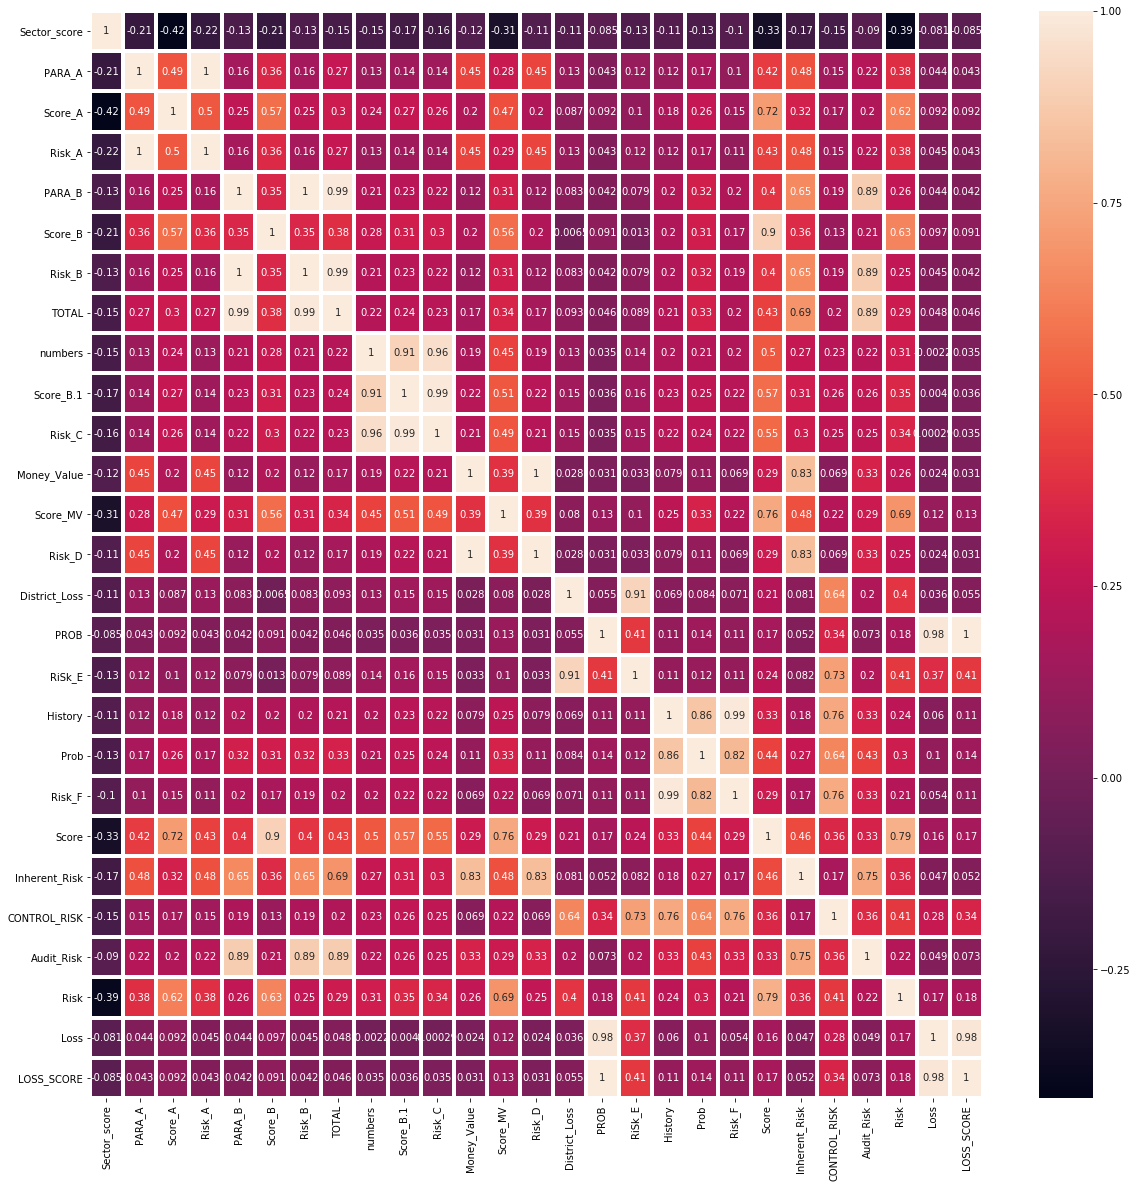

In [26]:
#corelation matrix
plt.figure(figsize=(20,20))
data_copy=data
data_copy.drop('LOCATION_ID',axis=1,inplace=True)
d=data_copy.corr()
sns.heatmap(d,annot= True,linecolor='white',linewidths=3)

### Final correlation matrix

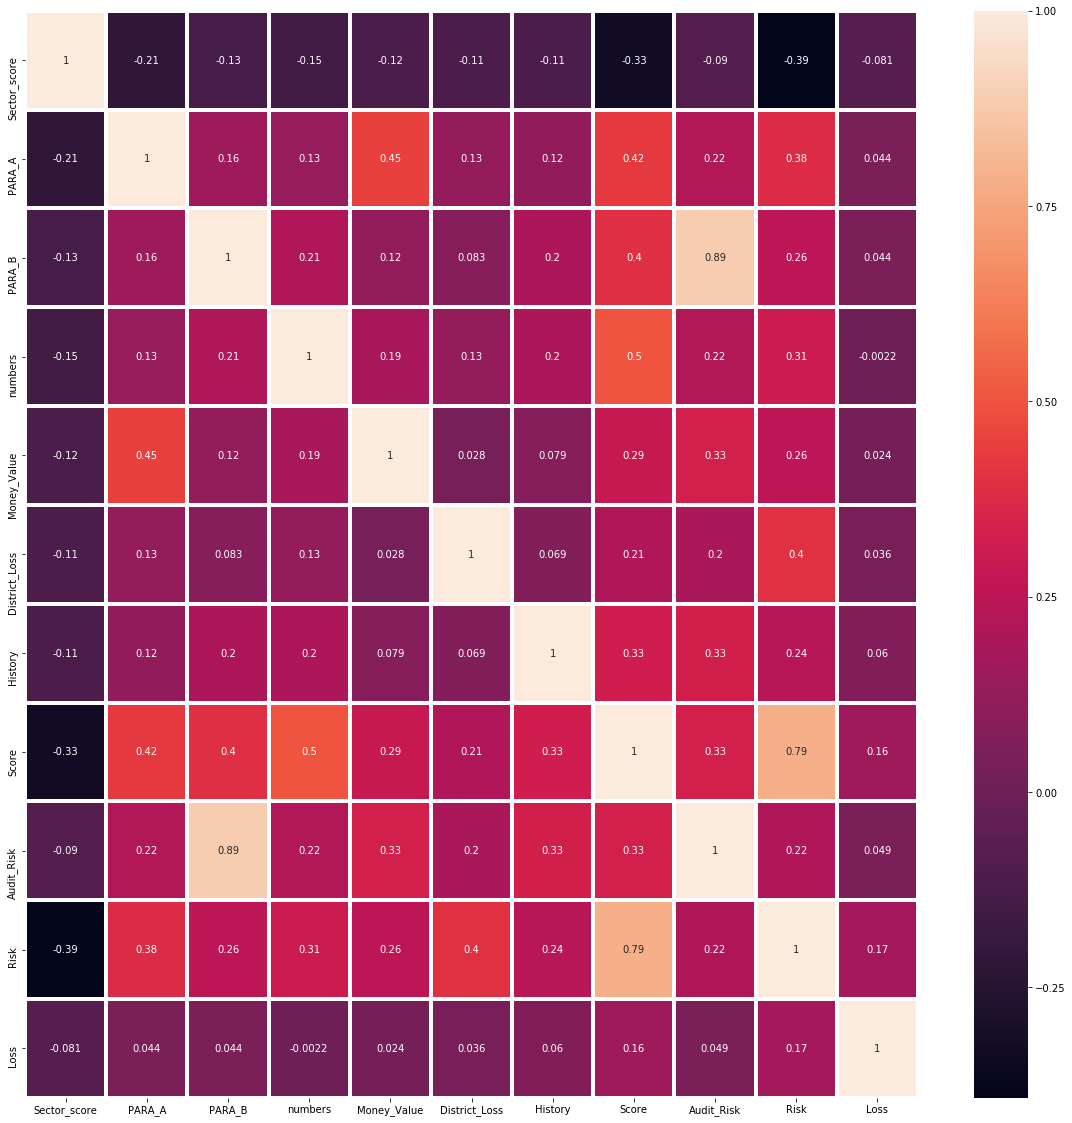

In [27]:
data.drop(['Risk_A','Score_A','Risk_B','Score_B','Score_B.1','Risk_C','Risk_D','Inherent_Risk','Score_MV','RiSk_E','PROB','CONTROL_RISK','Risk_F','LOSS_SCORE','Prob','TOTAL'],axis=1,inplace=True)
data_corr1= data.corr()
fig=plt.figure(figsize=(20,20))
sns.heatmap(data_corr1,annot= True,linecolor='white',linewidths=3)

### Removal of Outliers

1)So, the outliers that seemed rare were audit risk of 961.5144 for a firm in sector with score 2.72, the average audit risk score for this sector is less than 50, so this is a outlier and this is caused by a high paara b value which is greater than 1200

2)The firm with audit risk 222 is part of a sector with average risk score less than 20 so this can also be considered as a outlier

3)the firm with audit risk 204 is part of a sector which has very few instances(3) so we cannot consider this as an outlier

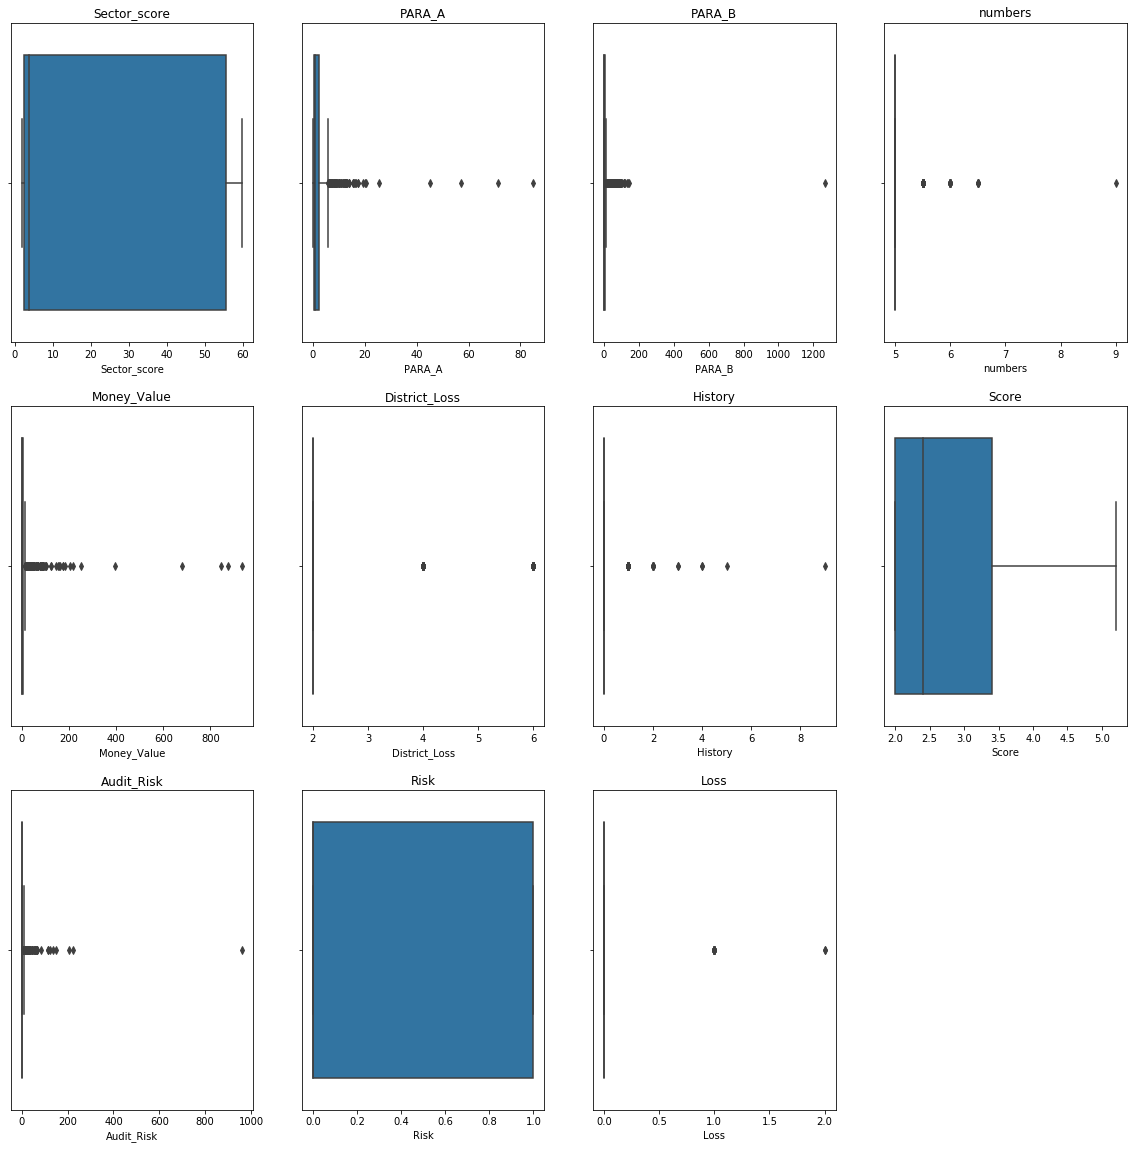

In [28]:
plt.figure(figsize=(20,20))
for i in range(0,data.shape[1]):
        plt.subplot(3,4,i+1)
        sns.boxplot(data.iloc[:,i])
        plt.title(data.columns[i])

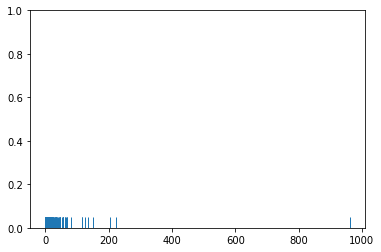

In [29]:
data[data['PARA_B']>1000]
data[data['Audit_Risk']>200]
sns.rugplot(data['Audit_Risk'])
data=data.drop([241,584],axis=0)

In [30]:
data_risk = data
data = data.drop('Risk', axis = 1)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 761 entries, 0 to 775
Data columns (total 10 columns):
Sector_score     761 non-null float64
PARA_A           761 non-null float64
PARA_B           761 non-null float64
numbers          761 non-null float64
Money_Value      761 non-null float64
District_Loss    761 non-null int64
History          761 non-null int64
Score            761 non-null float64
Audit_Risk       761 non-null float64
Loss             761 non-null int64
dtypes: float64(7), int64(3)
memory usage: 65.4 KB


# Regressions

In [32]:
from sklearn.model_selection import train_test_split
x= data.drop('Audit_Risk',axis=1)
y=data['Audit_Risk']
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=0)

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

C:\Users\jmoha\AppData\Local\conda\conda\envs\fluffy\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\jmoha\AppData\Local\conda\conda\envs\fluffy\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\jmoha\AppData\Local\conda\conda\envs\fluffy\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


## 1. Linear Regression

In [34]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True)
lr.fit(x_train,y_train)
print("Train:%.4f"%lr.score(x_train,y_train))
print("Test:%.4f"%lr.score(x_test,y_test))

Train:0.7797
Test:0.7583


Running Gradient Descent to Avoid underfitting as the train score is less,Discovered That The Coeficients given by the linear Regrerssion are already the optimum coefiecients

### Performing Gradient Descent

In [35]:
ones=np.ones((x_train.shape[0],1))
array=np.array(x_train)
xdesg=np.matrix(np.hstack((ones,array)))
xdesg=np.matrix(xdesg)
coef=lr.coef_.tolist()
coef.insert(0,lr.intercept_)
theta1=(np.array(coef).reshape(10,1))
y_actual=np.array(y_train).reshape(x_train.shape[0],1)
theta1

array([[ 5.96834288],
       [ 0.62534727],
       [ 1.57020272],
       [ 3.30097659],
       [ 3.39464987],
       [ 8.78855185],
       [ 2.98814887],
       [ 5.57337959],
       [-0.53643753],
       [ 1.14039543]])

In [36]:
def hypothesis(theta, X,n):
    h = np.ones((X.shape[0],1))
    theta = theta.reshape(1,n+1)
    for i in range(0,X.shape[0]):
        h[i] = float(np.dot(theta,xdesg.T[:,i]))
    h = h.reshape(X.shape[0],1)
    return h

In [37]:
h=hypothesis(theta1,xdesg,9)

In [38]:
def BGD(theta, alpha, num_iters, h, X, y, n):
    cost = np.ones(num_iters)
    for i in range(0,num_iters):
        theta[0] = theta[0] - (alpha/X.shape[0]) * float(sum(h - y))
        for j in range(1,n+1):
            theta[j] = theta[j] - ((alpha/X.shape[0]) * float(sum(np.dot(X.T[j],(h-y)))))
        h = hypothesis(theta, X, n)
        cost[i] = (1/X.shape[0]) * 0.5 * float(sum(np.square(h - y_actual)))
    theta = theta.reshape(1,n+1)
    return theta, cost

In [39]:
def linear_regression(X, y, alpha, num_iters):
    n = 9
    # initializing the parameter vector...
    theta = np.zeros(n+1)
    # hypothesis calculation....
    h = hypothesis(theta, xdesg, 9)
    # returning the optimized parameters by Gradient Descent...
    theta, cost = BGD(theta,alpha,num_iters,h,X,y,n)
    return theta, cost

In [40]:
list1=[]
for alpha in [0.001,0.01,0.1]:
    list1.append(linear_regression(xdesg,y_actual,alpha,1000)[1])

In [41]:
linear_regression(xdesg,y_actual,0.1,1000)

(array([[ 5.96834288,  0.62534727,  1.57020272,  3.30097659,  3.39464987,
          8.78855185,  2.98814887,  5.57337959, -0.53643753,  1.14039543]]),
 array([111.74585311,  84.65636294,  69.08268139,  59.60392223,
         53.45455178,  49.20438934,  46.09832693,  43.72540306,
         41.85241923,  40.33985763,  39.09904241,  38.07003386,
         37.20999647,  36.48690064,  35.87597429,  35.35759965,
         34.9159909 ,  34.53831058,  34.21404519,  33.93454297,
         33.69265966,  33.48248023,  33.29909658,  33.13842811,
         32.99707577,  32.87220286,  32.76143734,  32.66279167,
         32.57459678,  32.49544781,  32.42415934,  32.35972845,
         32.30130426,  32.24816268,  32.19968563,  32.15534375,
         32.11468208,  32.07730825,  32.04288258,  32.01110991,
         31.98173275,  31.95452562,  31.92929028,  31.90585175,
         31.884055  ,  31.86376214,  31.84485005,  31.82720841,
         31.81073806,  31.79534949,  31.78096173,  31.76750125,
         31.75490

### Cost Function Vs Number Of Iterations gradient descent

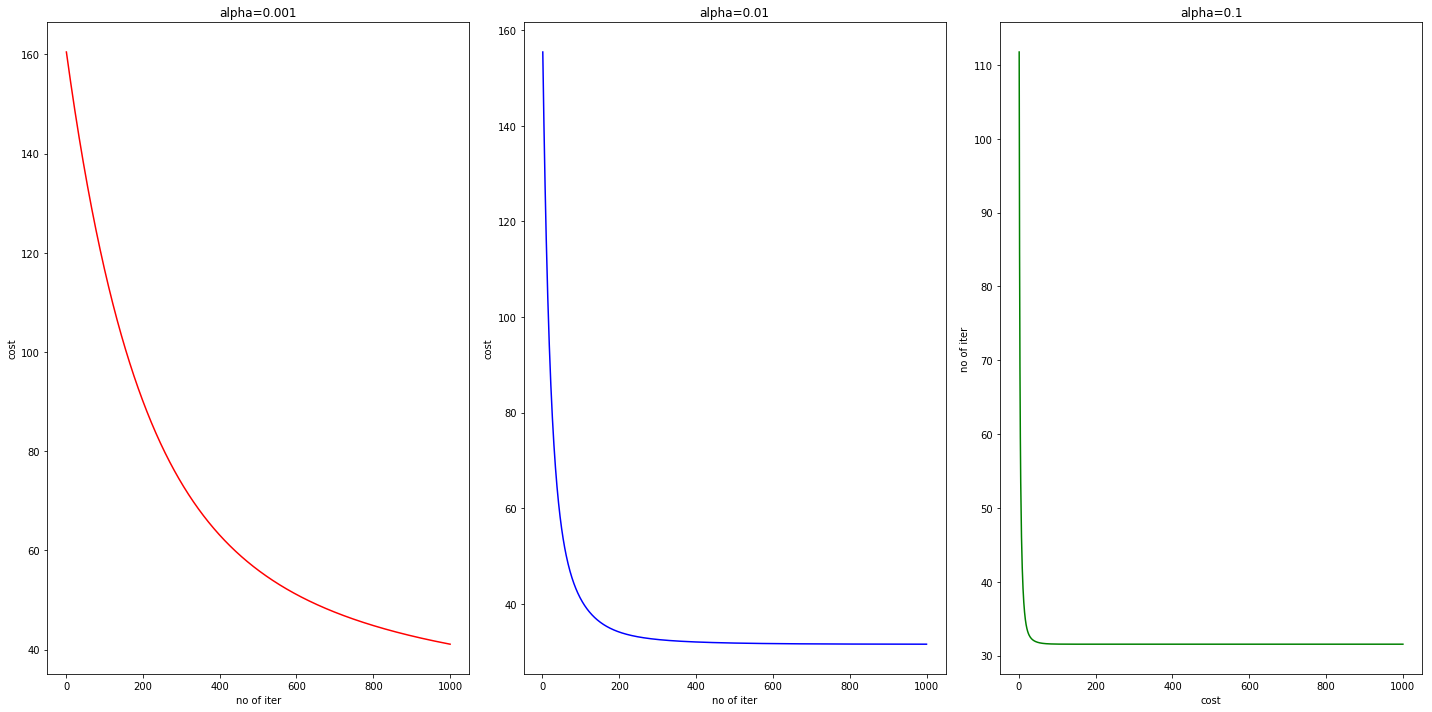

In [42]:
plt.figure(figsize=(20,10))
listalpha1=list1[0].tolist()
listalpha2=list1[1].tolist()
listalpha3= list1[2].tolist()
plt.subplot(1,3,1)
plt.plot(list(range(1,1001)),listalpha1,'r')
plt.ylabel('cost')
plt.xlabel('no of iter')
plt.title('alpha=0.001')
plt.subplot(1,3,2)
plt.plot(np.arange(1,1001).tolist(),listalpha2,'b')
plt.ylabel('cost')
plt.xlabel('no of iter')
plt.title('alpha=0.01')
plt.subplot(1,3,3)
plt.plot(np.arange(1,1001).tolist(),listalpha3,'g')
plt.xlabel('cost')
plt.ylabel('no of iter')
plt.title('alpha=0.1')
plt.tight_layout()

In [43]:
# Cross Validation
from sklearn.model_selection import cross_val_score
reg = LinearRegression(fit_intercept=True)
scores_train= cross_val_score(reg, x_train,y_train,cv=5)
scores_test= cross_val_score(reg,x_test,y_test)
print('mean train score is {}'.format(scores_train.mean()))
print('mean test score is {}'.format(scores_test.mean()))

mean train score is 0.4591950795684447
mean test score is 0.6439257948605523


C:\Users\jmoha\AppData\Local\conda\conda\envs\fluffy\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


## 2. Ridge

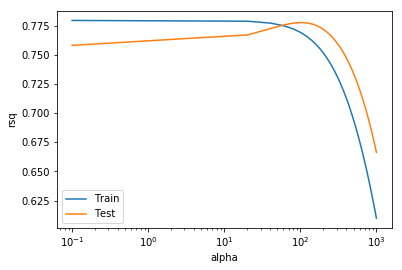

In [44]:
from  sklearn.linear_model import Ridge

x_range = list(np.linspace(0.1,1000))
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha,fit_intercept=True)
    ridge.fit(x_train,y_train)
    train_score_list.append(ridge.score(x_train,y_train))
    test_score_list.append(ridge.score(x_test, y_test))
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.plot(x_range,train_score_list,label='Train')
plt.plot(x_range,test_score_list,label='Test')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('rsq')
plt.legend()
plt.show()

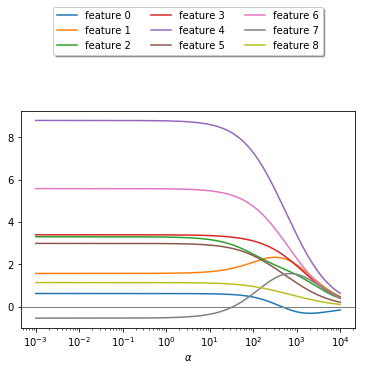

In [45]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha,fit_intercept=False)
    ridge.fit(x_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,9):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [46]:
#grid search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
a = list(np.linspace(0.01,1000))
param_grid = dict(alpha=a)
grid = GridSearchCV(ridge, param_grid, cv=5)
grid.fit(x_train,y_train)
print('best param is alpha ={}'.format(grid.best_params_))

best param is alpha ={'alpha': 285.72142857142853}


C:\Users\jmoha\AppData\Local\conda\conda\envs\fluffy\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [47]:
#cross validation
ridge = Ridge(alpha = 285.72142857142853)
train_score_list = cross_val_score(ridge,x_train,y_train,cv=5)
test_score_list = cross_val_score(ridge,x_test,y_test,cv=5)
print("Avg Train Score:%.4f"%train_score_list.mean())
print("Avg Test Score:%.4f"%test_score_list.mean())

Avg Train Score:0.6862
Avg Test Score:0.3913


In [48]:
#train and test score for alpha=97
ridge=Ridge(alpha=97)
rid=ridge.fit(x_train,y_train)
train_score=rid.score(x_train,y_train)
test_score= rid.score(x_test,y_test)
print('train_score:{}'.format(train_score))
print('test_score:{}'.format(test_score))

train_score:0.7700165349530832
test_score:0.7779047614780942


## 3. LASSO

Text(0.5, 0, '$\\alpha$')

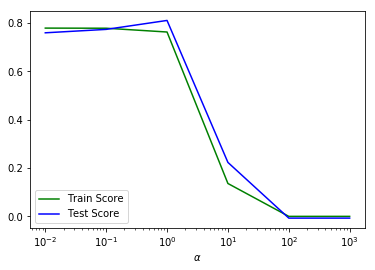

In [49]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100,1000]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha,fit_intercept=True)
    lasso.fit(x_train,y_train)
    train_score_list.append(lasso.score(x_train,y_train))
    test_score_list.append(lasso.score(x_test, y_test))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

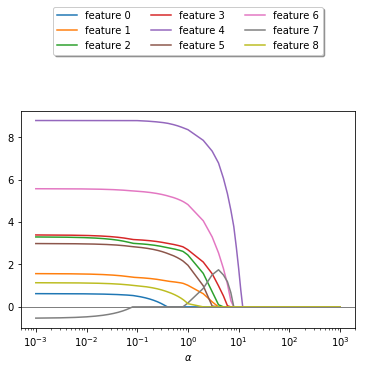

In [50]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha,fit_intercept=True)
    lasso.fit(x_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,9):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [51]:
#grid search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
a = list(np.linspace(0.01,1000))
param_grid = dict(alpha=a)
grid = GridSearchCV(lasso, param_grid, cv=5)
grid.fit(x_train,y_train)
print('best param is alpha ={}'.format(grid.best_params_))

best param is alpha ={'alpha': 0.01}


C:\Users\jmoha\AppData\Local\conda\conda\envs\fluffy\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [52]:
# Using Cross Validation
from sklearn.model_selection import cross_val_score
lasso = Lasso(alpha=0.01)
train_score_list = cross_val_score(lasso,x_train,y_train,cv=5)
test_score_list = cross_val_score(lasso,x_test,y_test,cv=5)
print("Avg Train Score:%.4f"%train_score_list.mean())
print("Avg Test Score:%.4f"%test_score_list.mean())

Avg Train Score:0.4613
Avg Test Score:0.7648


In [53]:
#train and test score for alpha=0.1
lasso=Lasso(alpha=0.01)
lass=lasso.fit(x_train,y_train)
train_score=lass.score(x_train,y_train)
test_score= lass.score(x_test,y_test)
print('train_score:{}'.format(train_score))
print('test_score:{}'.format(test_score))

train_score:0.7797153648344073
test_score:0.7602476338576051


## 4. KNN Regression

Text(0, 0.5, 'rsq')

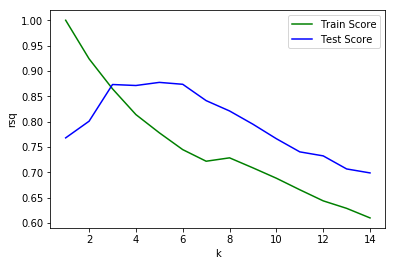

In [54]:
#kneibhours regressor
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,15):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(x_train, y_train)
    train_score_array.append(knn_reg.score(x_train, y_train))
    test_score_array.append(knn_reg.score(x_test, y_test))

x_axis = range(1,15)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('rsq')

In [55]:
#grid search
from sklearn.model_selection import GridSearchCV
k = list(range(1, 15))
param_grid = dict(n_neighbors=k)
grid = GridSearchCV(knn_reg, param_grid, cv=5)
grid.fit(x_train,y_train)
print('best param is k ={}'.format(grid.best_params_))

best param is k ={'n_neighbors': 1}


C:\Users\jmoha\AppData\Local\conda\conda\envs\fluffy\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [56]:
# Using Cross Validation
from sklearn.model_selection import cross_val_score
knn_reg = KNeighborsRegressor(n_neighbors=1)
train_score_list = cross_val_score(knn_reg,x_train,y_train,cv=5)
test_score_list = cross_val_score(knn_reg,x_test,y_test,cv=5)
print("Avg Train Score:%.4f"%train_score_list.mean())
print("Avg Test Score:%.4f"%test_score_list.mean())

Avg Train Score:0.7330
Avg Test Score:0.4585


In [57]:
#using knn,k=3
knn= KNeighborsRegressor(n_neighbors=3)
kn=knn.fit(x_train,y_train)
train_score=kn.score(x_train,y_train)
test_score=kn.score(x_test,y_test)
print('train_score:{}'.format(train_score))
print('test_score:{}'.format(test_score))

train_score:0.8646190253589708
test_score:0.8731144279716425


## 5. Polynomial Regression

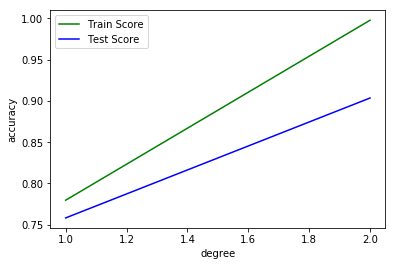

In [58]:
from  sklearn.preprocessing  import PolynomialFeatures
train_score_list = []
test_score_list = []

for n in range(1,3):
    poly = PolynomialFeatures(n)
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.transform(x_test)
    lr.fit(x_train_poly, y_train)
    train_score_list.append(lr.score(x_train_poly, y_train))
    test_score_list.append(lr.score(x_test_poly, y_test))
%matplotlib inline

x_axis = range(1,3)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

In [59]:
train_score_list

[0.7797227749461084, 0.9978725176711574]

In [60]:
test_score_list

[0.7582570475916155, 0.903591824906198]

In [61]:
#cross validation
from sklearn.model_selection import cross_val_score
scores_test=[]
scores_train=[]
poly = PolynomialFeatures(2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)
lr=LinearRegression()
lr.fit(x_train_poly,y_train)
scores_train = cross_val_score(lr,x_train_poly,y_train,cv=5)
scores_test = cross_val_score(lr,x_test_poly,y_test,cv=5)
print("Cross-validation Train scores: {}".format(scores_train))
print("Average Train cross-validation score: {:.2f}".format(scores_train.mean()))
print("Cross-validation Test scores: {}".format(scores_test))
print("Average Test cross-validation score: {:.2f}".format(scores_test.mean()))

Cross-validation Train scores: [ 9.45537788e-01  9.57450462e-01  9.72587231e-01 -2.37987116e+22
  7.42464220e-01]
Average Train cross-validation score: -4759742318420148879360.00
Cross-validation Test scores: [ 0.57490222  0.97762458 -0.74989523  0.96657037  0.57053391]
Average Test cross-validation score: 0.47


## 6. Linear SVM Regression

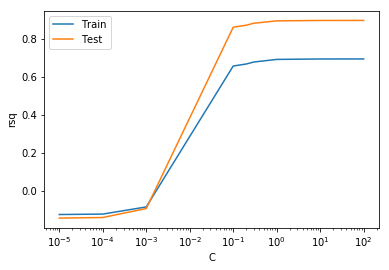

In [62]:
from sklearn.svm import LinearSVR
train_score_list=[]
test_score_list=[]
C=[0.00001,0.0001,0.001,0.1,0.2,0.3,1,10,100]

for i in C:
    svr = LinearSVR(C=i,max_iter=1000000,fit_intercept=True)
    svr.fit(x_train,y_train)
    train_score_list.append(svr.score(x_train,y_train))
    test_score_list.append(svr.score(x_test,y_test))

%matplotlib inline
plt.plot(C,train_score_list,label='Train')
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('rsq')
plt.plot(C,test_score_list,label='Test')
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('rsq')
plt.legend()

In [63]:
#grid search
from sklearn.model_selection import GridSearchCV
c= [0.1,0.2,0.3,0.5,1]
param_grid = dict(C=c)
grid = GridSearchCV(svr,param_grid, cv=5)
grid.fit(x_train,y_train)
print('best param is c ={}'.format(grid.best_params_))

best param is c ={'C': 0.2}


C:\Users\jmoha\AppData\Local\conda\conda\envs\fluffy\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [64]:
#cross validation
from sklearn.model_selection import cross_val_score
svr = LinearSVR(C=0.2,max_iter=10000)
scores_train = cross_val_score(svr,x_train,y_train, cv=5)
scores_test= cross_val_score(svr,x_test,y_test, cv=5)
print('avg train score {}'.format(scores_train.mean()))
print('avg test score {}'.format(scores_test.mean()))

avg train score 0.696318561904856
avg test score 0.5566064323277825


## 7. Kernelized SVM Regression

### RBF Kernel

In [65]:
#grid search for svr with rbf kernal
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
c= [0.0001,0.001,0.01,0.1,1,10]
gamma=[0.0001,0.001,0.01,0.1,1,10]
param_grid = {'C':[0.0001,0.001,0.01,0.1,1,10],'gamma':[0.0001,0.001,0.01,0.1,1,10]}
grid = GridSearchCV(SVR(kernel='rbf'),param_grid, cv=5)
grid.fit(x_train,y_train)
print('best params are  ={}'.format(grid.best_params_))

best params are  ={'C': 10, 'gamma': 0.01}


C:\Users\jmoha\AppData\Local\conda\conda\envs\fluffy\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [66]:
#cross validation for svr with rbf kernal
from sklearn.model_selection import cross_val_score
scores_train = cross_val_score(SVR(kernel='rbf',gamma=0.01,C=10),x_train,y_train, cv=5)
scores_test= cross_val_score(SVR(kernel='rbf',gamma=0.01,C=10),x_test,y_test, cv=5)
print('avg train score {}'.format(scores_train.mean()))
print('avg test score {}'.format(scores_test.mean()))

avg train score 0.6765558028026868
avg test score 0.5284812765663096


### Linear Kernel

In [67]:
#grid search for svr with linear kernal
from sklearn.model_selection import GridSearchCV
scores_test=[]
scores_train=[]
c= [0.0001,0.001,0.01,0.1,1,10]
gamma=[0.0001,0.001,0.01,0.1,1,10]
param_grid = {'C':[0.0001,0.001,0.01,0.1,1,10],'gamma':[0.0001,0.001,0.01,0.1,1,10]}
grid = GridSearchCV(SVR(kernel='linear'),param_grid, cv=5)
grid.fit(x_train,y_train)
print('best params are  ={}'.format(grid.best_params_))

best params are  ={'C': 0.1, 'gamma': 0.0001}


C:\Users\jmoha\AppData\Local\conda\conda\envs\fluffy\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [68]:
#cross validation for svr with linear kernal
from sklearn.model_selection import cross_val_score
scores_train=[]
scores_test=[]
scores_train = cross_val_score(SVR(kernel='linear',gamma=0.01,C=0.1),x_train,y_train, cv=5)
scores_test= cross_val_score(SVR(kernel='linear',gamma=0.0001,C=0.1),x_test,y_test, cv=5)
print('avg train score {}'.format(scores_train.mean()))
print('avg test score {}'.format(scores_test.mean()))

avg train score 0.7068087589891892
avg test score 0.4723286374828766


We choose Polynomial regression as our best model with degree = 2

In [69]:
lr.score(x_test_poly,y_test)

0.903591824906198

# Classification Algorithms

In [70]:
data = data_risk
data = data.drop('Audit_Risk', axis=1)

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 761 entries, 0 to 775
Data columns (total 10 columns):
Sector_score     761 non-null float64
PARA_A           761 non-null float64
PARA_B           761 non-null float64
numbers          761 non-null float64
Money_Value      761 non-null float64
District_Loss    761 non-null int64
History          761 non-null int64
Score            761 non-null float64
Risk             761 non-null int64
Loss             761 non-null int64
dtypes: float64(6), int64(4)
memory usage: 65.4 KB


## 1. KNN Classification

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [73]:
x = data.drop('Risk',axis=1)
y = data['Risk']
x_train_org,x_test_org,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=0)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train_org)
x_test = scaler.transform(x_test_org)

C:\Users\jmoha\AppData\Local\conda\conda\envs\fluffy\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


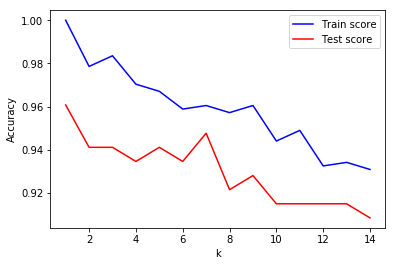

In [74]:
train_score = []
test_score = []

n = range(1,15)
for i in n:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    train_score.append(knn.score(x_train,y_train))
    test_score.append(knn.score(x_test,y_test))

plt.plot(n,train_score,'b',label='Train score')
plt.plot(n,test_score,'r',label = 'Test score')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

It seems like k = 7 is the best parameter for KNN Model

In [75]:
knn = KNeighborsClassifier(7)
knn.fit(x_train, y_train)
print('Train score: {:.4f}'.format(knn.score(x_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(x_test, y_test)))

Train score: 0.9605
Test score: 0.9477


In [76]:
#Confusion Matrix
pred = knn.predict(x_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[93  1]
 [ 7 52]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        94
           1       0.98      0.88      0.93        59

   micro avg       0.95      0.95      0.95       153
   macro avg       0.96      0.94      0.94       153
weighted avg       0.95      0.95      0.95       153



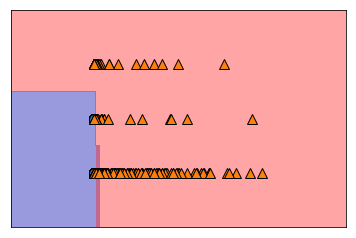

In [77]:
x_b = x_train[0:774,[2,5]]
y_b = y_train[0:774]

knn = KNeighborsClassifier(7)
knn.fit(x_b, y_b)

mglearn.plots.plot_2d_separator(knn, x_b, fill=True, eps=0.5, alpha=.4)
mglearn.discrete_scatter(x_b[:, 0], x_b[:, 1], y_b)

## 2. Logistic Regression

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [79]:
x= data.drop('Risk',axis=1)
y=data['Risk']
x_train_org,x_test_org,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=0)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train_org)
x_test = scaler.transform(x_test_org)

C:\Users\jmoha\AppData\Local\conda\conda\envs\fluffy\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [80]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000,10000,100000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c, solver = 'liblinear')
    log_l2 = LogisticRegression(penalty = 'l2', C = c, solver = 'lbfgs')
    log_l1.fit(x_train, y_train)
    log_l2.fit(x_train, y_train)
    train_score_l1.append(log_l1.score(x_train, y_train))
    train_score_l2.append(log_l2.score(x_train, y_train))
    test_score_l1.append(log_l1.score(x_test, y_test))
    test_score_l2.append(log_l2.score(x_test, y_test))

C:\Users\jmoha\AppData\Local\conda\conda\envs\fluffy\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\jmoha\AppData\Local\conda\conda\envs\fluffy\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\jmoha\AppData\Local\conda\conda\envs\fluffy\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\jmoha\AppData\Local\conda\conda\envs\fluffy\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\jmoha\AppData\Local\conda\conda\envs\fluffy\lib\site-packages\skl

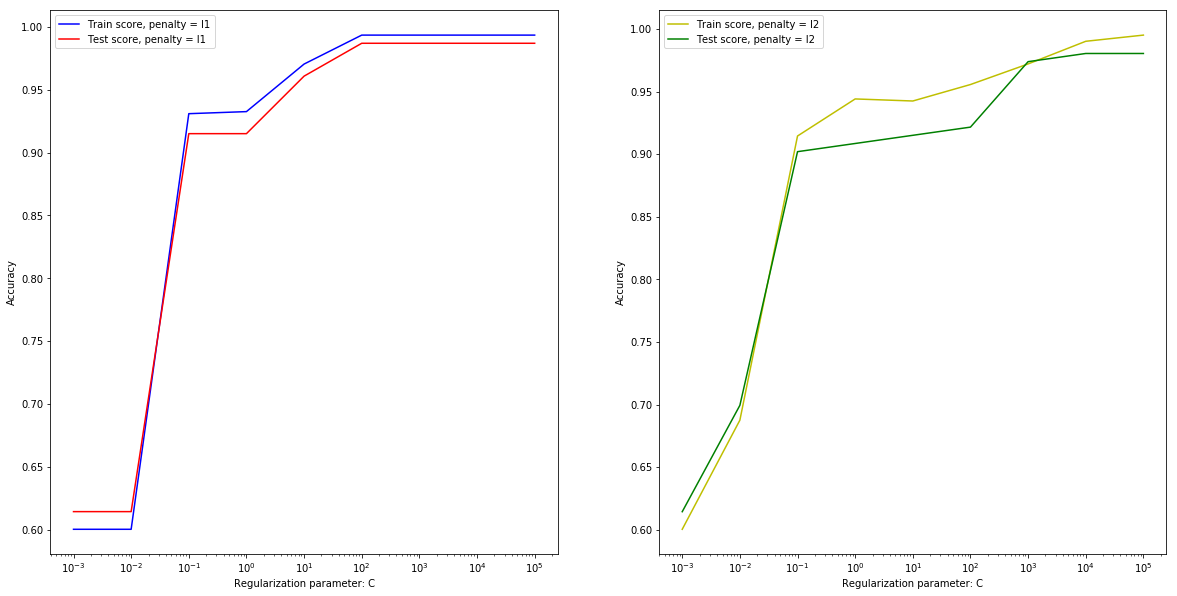

In [81]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1',c='blue')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1',c='r')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.subplot(1,2,2)
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2',c='y')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2',c='g')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

L1 Regularization with C=100 gives better accuracy. With L1 penalty, the model is generalising more on the test dataset at C=100. So we choose L1 and C=100 for Logestic Regression

In [82]:
log_l1 = LogisticRegression(penalty = 'l1', C = 100)
log_l2 = LogisticRegression(penalty = 'l2', C = 100)

log_l1.fit(x_train,y_train)
log_l2.fit(x_train,y_train)

print("Penality: l1")
print("Train_score:{:.4f}".format(log_l1.score(x_train, y_train)))
print("Test_score:{:.4f}".format(log_l1.score(x_test, y_test)))

print("Penality: l2")
print("Train_score:{:.4f}".format(log_l2.score(x_train, y_train)))
print("Test_score:{:.4f}".format(log_l2.score(x_test, y_test)))

C:\Users\jmoha\AppData\Local\conda\conda\envs\fluffy\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Penality: l1
Train_score:0.9918
Test_score:0.9869
Penality: l2
Train_score:0.9556
Test_score:0.9216


C:\Users\jmoha\AppData\Local\conda\conda\envs\fluffy\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\jmoha\AppData\Local\conda\conda\envs\fluffy\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


By considering above Scores, L1 Regularization gives better accuracy

In [83]:
logreg = LogisticRegression(penalty='l1', C=100)
logreg.fit(x_train, y_train)
print('Train score: {:.4f}'.format(logreg.score(x_train, y_train)))
print('Test score: {:.4f}'.format(logreg.score(x_test, y_test)))

C:\Users\jmoha\AppData\Local\conda\conda\envs\fluffy\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train score: 0.9918
Test score: 0.9869


C:\Users\jmoha\AppData\Local\conda\conda\envs\fluffy\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [84]:
#Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
pred = logreg.predict(x_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[94  0]
 [ 2 57]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        94
           1       1.00      0.97      0.98        59

   micro avg       0.99      0.99      0.99       153
   macro avg       0.99      0.98      0.99       153
weighted avg       0.99      0.99      0.99       153



C:\Users\jmoha\AppData\Local\conda\conda\envs\fluffy\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


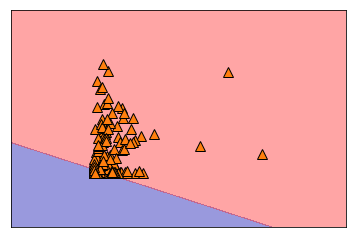

In [85]:
import mglearn
x_b = x_train[50:500, [1,2]]
y_b = y_train[50:500]

lreg = LogisticRegression(penalty = 'l1', C=100)
lreg.fit(x_b, y_b)

mglearn.plots.plot_2d_separator(lreg, x_b, fill=True, eps=0.5, alpha=.4)
mglearn.discrete_scatter(x_b[:, 0], x_b[:, 1], y_b)

## 3. Linear SVM Classification

In [86]:
from sklearn.model_selection import train_test_split
x = data.drop('Risk',axis=1)
y = data['Risk']

x_train_org, x_test_org, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
x_train = scale.fit_transform(x_train_org)
x_test = scale.transform(x_test_org)

C:\Users\jmoha\AppData\Local\conda\conda\envs\fluffy\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


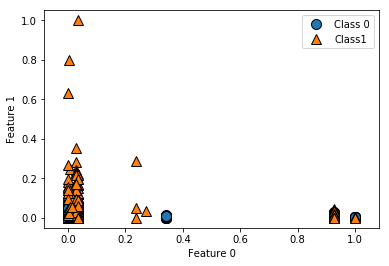

In [87]:
mglearn.discrete_scatter(x_train[:, 0], x_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class1'])

In [88]:
from sklearn.svm import LinearSVC
#for i in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
linear_svm = LinearSVC(C=100)
linear_svm.fit(x_train,y_train)
print('Train score: {:.4f}'.format(linear_svm.score(x_train,y_train)))
print('Test score: {:.4f}'.format(linear_svm.score(x_test,y_test)))

Train score: 0.9803
Test score: 0.9608


C:\Users\jmoha\AppData\Local\conda\conda\envs\fluffy\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [89]:
#Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
pred = linear_svm.predict(x_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[94  0]
 [ 6 53]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        94
           1       1.00      0.90      0.95        59

   micro avg       0.96      0.96      0.96       153
   macro avg       0.97      0.95      0.96       153
weighted avg       0.96      0.96      0.96       153



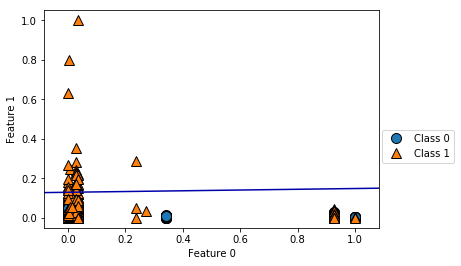

In [90]:
mglearn.discrete_scatter(x_train[:, 0], x_train[:, 1], y_train)
line = np.linspace(-5, 5)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1'], loc=(1.01, 0.3))

## 4. Kernelized SVM Classification

### Linear Kernel

In [91]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC

In [92]:
#kernel = 'Linear'
C1 = [0.01,0.1,1,10]

for i in C1:
    svc = SVC(C=i,kernel='linear')
    svc.fit(x_train,y_train)
    print('C:{}'.format(i))
    print('Train score: {:.4f},Test score: {:.4f}'.format(svc.score(x_train,y_train),svc.score(x_test,y_test)))

C:0.01
Train score: 0.7155,Test score: 0.7059
C:0.1
Train score: 0.9243,Test score: 0.9020
C:1
Train score: 0.9490,Test score: 0.9085
C:10
Train score: 0.9490,Test score: 0.9150


Best Parameter: C=10

In [93]:
svc = SVC(C=10,kernel='linear')
svc.fit(x_train,y_train)

#Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
pred = svc.predict(x_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[92  2]
 [11 48]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        94
           1       0.96      0.81      0.88        59

   micro avg       0.92      0.92      0.92       153
   macro avg       0.93      0.90      0.91       153
weighted avg       0.92      0.92      0.91       153



### RBF Kernel

In [94]:
#kernal = 'rbf'
C1 = [0.01,0.1,1,10]
gamma1 = [0.01,0.1,1,10]

for i in C1:
    for j in gamma1:
        svc = SVC(C=i,kernel='rbf',gamma=j)
        svc.fit(x_train,y_train)
        print('C:{},gamma:{}'.format(i,j))
        print('Train score: {:.4f},Test score: {:.4f}'.format(svc.score(x_train,y_train),svc.score(x_test,y_test)))

C:0.01,gamma:0.01
Train score: 0.6003,Test score: 0.6144
C:0.01,gamma:0.1
Train score: 0.6003,Test score: 0.6144
C:0.01,gamma:1
Train score: 0.7138,Test score: 0.6863
C:0.01,gamma:10
Train score: 0.7549,Test score: 0.7712
C:0.1,gamma:0.01
Train score: 0.6003,Test score: 0.6144
C:0.1,gamma:0.1
Train score: 0.8651,Test score: 0.8693
C:0.1,gamma:1
Train score: 0.9260,Test score: 0.8954
C:0.1,gamma:10
Train score: 0.9293,Test score: 0.8889
C:1,gamma:0.01
Train score: 0.8701,Test score: 0.8693
C:1,gamma:0.1
Train score: 0.9326,Test score: 0.9085
C:1,gamma:1
Train score: 0.9391,Test score: 0.9216
C:1,gamma:10
Train score: 0.9589,Test score: 0.9216
C:10,gamma:0.01
Train score: 0.9342,Test score: 0.9085
C:10,gamma:0.1
Train score: 0.9424,Test score: 0.9216
C:10,gamma:1
Train score: 0.9638,Test score: 0.9281
C:10,gamma:10
Train score: 0.9770,Test score: 0.9608


Best Parameter Values: C = 10, gamma = 10

In [95]:
svc = SVC(C=10,kernel='rbf',gamma=10)
svc.fit(x_train,y_train)
#Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
pred = svc.predict(x_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[93  1]
 [ 5 54]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        94
           1       0.98      0.92      0.95        59

   micro avg       0.96      0.96      0.96       153
   macro avg       0.97      0.95      0.96       153
weighted avg       0.96      0.96      0.96       153



### Polynomial Kernel

In [96]:
#kernal = poly
C1 = [0.01,0.1,1,10]
gamma1 = [0.01,0.1,1,10]

for i in C1:
    for j in gamma1:
        svc = SVC(C=i,kernel='poly',gamma=j)
        svc.fit(x_train,y_train)
        print('C:{},gamma:{}'.format(i,j))
        print('Train score: {:.4f},Test score: {:.4f}'.format(svc.score(x_train,y_train),svc.score(x_test,y_test)))

C:0.01,gamma:0.01
Train score: 0.6003,Test score: 0.6144
C:0.01,gamma:0.1
Train score: 0.6003,Test score: 0.6144
C:0.01,gamma:1
Train score: 0.6447,Test score: 0.6536
C:0.01,gamma:10
Train score: 0.9178,Test score: 0.9150
C:0.1,gamma:0.01
Train score: 0.6003,Test score: 0.6144
C:0.1,gamma:0.1
Train score: 0.6003,Test score: 0.6144
C:0.1,gamma:1
Train score: 0.8191,Test score: 0.7974
C:0.1,gamma:10
Train score: 0.9539,Test score: 0.9150
C:1,gamma:0.01
Train score: 0.6003,Test score: 0.6144
C:1,gamma:0.1
Train score: 0.6003,Test score: 0.6144
C:1,gamma:1
Train score: 0.8849,Test score: 0.8889
C:1,gamma:10
Train score: 0.9572,Test score: 0.9281
C:10,gamma:0.01
Train score: 0.6003,Test score: 0.6144
C:10,gamma:0.1
Train score: 0.6447,Test score: 0.6536
C:10,gamma:1
Train score: 0.9178,Test score: 0.9150
C:10,gamma:10
Train score: 0.9770,Test score: 0.9412


Best Parameter Values: C = 1, gamma = 10

In [97]:
svc = SVC(C=1, kernel='poly', gamma=10)
svc.fit(x_train,y_train)
#Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
pred = svc.predict(x_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[93  1]
 [10 49]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94        94
           1       0.98      0.83      0.90        59

   micro avg       0.93      0.93      0.93       153
   macro avg       0.94      0.91      0.92       153
weighted avg       0.93      0.93      0.93       153



## Decision Tree

In [108]:
from sklearn.tree import DecisionTreeClassifier

x= data.drop('Risk',axis=1)
y=data['Risk']

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=0)

dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(x_train, y_train)

print("Accuracy on training set: {:.4f}".format(dtree.score(x_train, y_train)))
print("Accuracy on test set: {:.4f}".format(dtree.score(x_test, y_test)))

Accuracy on training set: 1.0000
Accuracy on test set: 0.9804


In [109]:
dtree = DecisionTreeClassifier(max_depth=4, random_state=0)
dtree.fit(x_train, y_train)

print("Accuracy on training set: {:.4f}".format(dtree.score(x_train, y_train)))
print("Accuracy on test set: {:.4f}".format(dtree.score(x_test, y_test)))

Accuracy on training set: 0.9671
Accuracy on test set: 0.9542


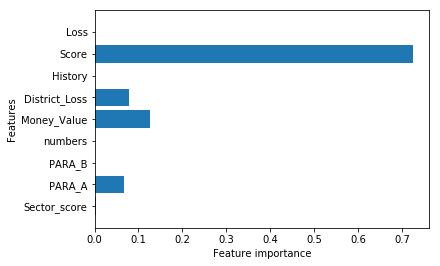

<Figure size 720x720 with 0 Axes>

In [100]:
def plot_feature_importances_risk(model):
    n_features = x.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), list(x.columns))
    plt.xlabel("Feature importance")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)
    plt.figure(figsize=(10,10))
plot_feature_importances_risk(dtree)

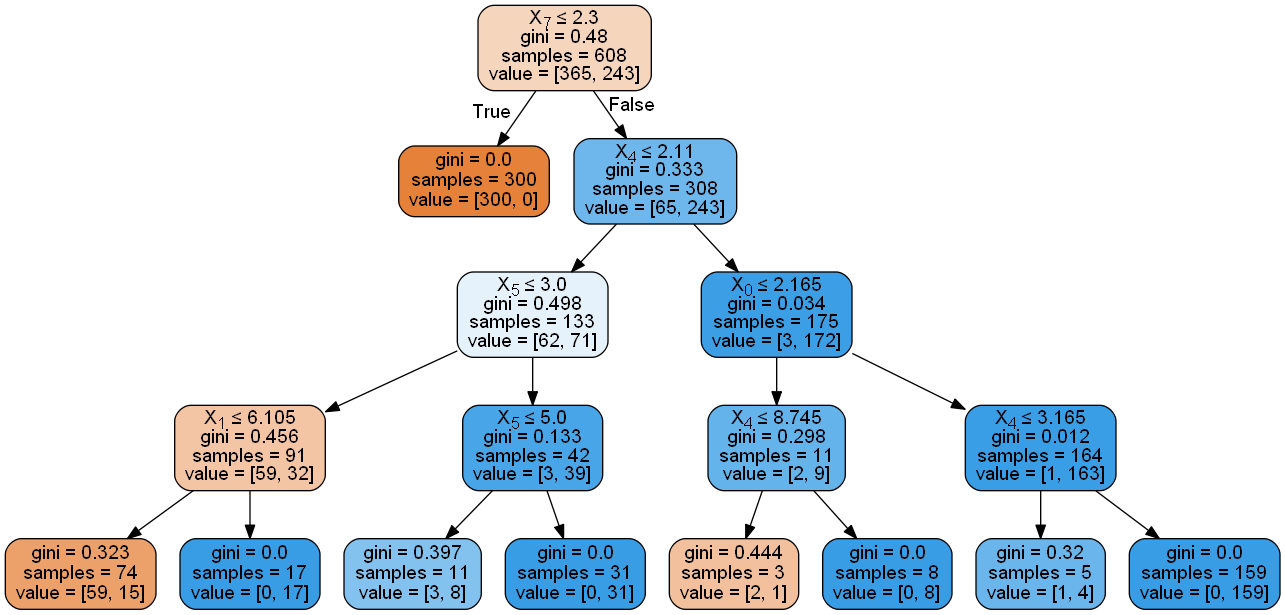

In [101]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/' + 'C:/Users/jmoha/AppData/Local/conda/conda/envs/fluffy/Lib/site-packages/graphviz' + 'C:/Users/jmoha/AppData/Local/conda/conda/envs/fluffy/Lib/site-packages/PIL'

# Create DOT data
dot_data = export_graphviz(dtree, out_file=None, filled=True, rounded=True, special_characters=True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
from IPython.display import Image
Image(graph.create_png())

In [102]:
#Confusion Matrix
pred = dtree.predict(x_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[91  3]
 [ 4 55]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        94
           1       0.95      0.93      0.94        59

   micro avg       0.95      0.95      0.95       153
   macro avg       0.95      0.95      0.95       153
weighted avg       0.95      0.95      0.95       153



### Evaluation Strategy
The dataset belongs Government of India. All the firms are under the Government and act under the supervision of the Government. There are two cases here

1. A firm is fraudulant but it is classified as not fraudulant (False Negative)
2. A firm is not fraudulant but it is classified as fraudulant (False Positive)

The cost associated with misclassification of a Fraudulant Firm is greater than the cost associated with misclassification of a Non Fraudulant Firm

This is the case because, when a misclassification is done on a fraudulant firm the government loses lot of money as opposed to misclassifying a not fraudulant firm when there is practically no loss for the Government

In [103]:
Regression = {'Model':['Linear Regression','Ridge Regression','Lasso Regression','KNN Regression','Plynomial Regression','Linear SVM Regression', 'RBF Kernel', 'Linear Kernel'],'Avg.Train Score':[0.4592,0.6862,0.4613,0.7330,0.91,0.6964,0.6766,0.7068],'Avg_Test_Score':[0.6439,0.3913,0.7648,0.4585,0.47,0.5568,0.5285,0.4723]}
Regression_score = pd.DataFrame(Regression)
Regression_score

,Model,Avg.Train Score,Avg_Test_Score
0,Linear Regression,0.4592,0.6439
1,Ridge Regression,0.6862,0.3913
2,Lasso Regression,0.4613,0.7648
3,KNN Regression,0.7330,0.4585
4,Plynomial Regression,0.9100,0.4700
5,Linear SVM Regression,0.6964,0.5568
6,RBF Kernel,0.6766,0.5285
7,Linear Kernel,0.7068,0.4723


In [110]:
Classification = {'Models before PCA':['KNN classification','Logistic Regrerssion','Linear SVM','SVC - linear','SVC - rbf','SVC - poly','Decision Tree'],'Avg.Train Score':[0.9605,0.9934,0.9803,0.9490,0.9770,0.9572,0.9671],'Avg_Test_Score':[0.9477,0.9869,0.9608,0.9150,0.9608,0.9281,0.9542]}
Classification_score = pd.DataFrame(Classification)
Classification_score

,Models before PCA,Avg.Train Score,Avg_Test_Score
0,KNN classification,0.9605,0.9477
1,Logistic Regrerssion,0.9934,0.9869
2,Linear SVM,0.9803,0.9608
3,SVC - linear,0.9490,0.9150
4,SVC - rbf,0.9770,0.9608
5,SVC - poly,0.9572,0.9281
6,Decision Tree,0.9671,0.9542


From the above information we conclude Logistic Regeression with L1 penalty and C=100 is our best classification model